<h1 style='color:purple' align='center'>Data Science Regression Project: Predicción del precio de alquiler en Barcelona Ciudad en 2023</h1>

In [47]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

<h3 style='color:blue'>Data Load: cargamos el archivo "alquiler_Barcelona_final.csv" en un dataframe</h3>

In [48]:
df1 = pd.read_csv("alquiler_Barcelona_final.csv")
df1.head()

,barrio,distrito,price,size,rooms,bathrooms
0,el Raval,Ciutat Vella,901.0,76,2,1
1,el Raval,Ciutat Vella,1675.0,136,3,2
2,el Raval,Ciutat Vella,3977.0,250,5,3
3,el Raval,Ciutat Vella,1152.0,110,3,2
4,el Raval,Ciutat Vella,838.0,80,2,1


In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12022 entries, 0 to 12021
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   barrio     12022 non-null  object 
 1   distrito   12022 non-null  object 
 2   price      12022 non-null  float64
 3   size       12022 non-null  int64  
 4   rooms      12022 non-null  int64  
 5   bathrooms  12022 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 563.7+ KB


In [50]:
df1['price'] = df1['price'].astype(int)

In [51]:
print(df1['price'].dtypes)

int32


In [52]:
df1.shape

(12022, 6)

In [53]:
df1.columns

Index(['barrio', 'distrito', 'price', 'size', 'rooms', 'bathrooms'], dtype='object')

In [54]:
df1.rename(columns={'price': 'precio','size': 'superficie', 'rooms': 'habitaciones', 'bathrooms': 'baños' }, inplace=True)

In [55]:
df1['barrio'].unique()

array(['el Raval', 'Gotic', 'Barceloneta',
       'Sant Pere. Santa Caterina i la Ribera', 'Fort Pienc',
       'Sagrada Familia', "la Dreta de l'Eixample",
       "l'Antiga Esquerra de l'Eixample",
       "la Nova Esquerra de l'Eixample", 'Sant Antoni', 'el Poble Sec',
       'la Font de la Guatlla', 'Hostafrancs', 'la Bordeta',
       'Sants - Badal', 'Sants', 'les Corts',
       'la Maternitat i Sant Ramon', 'Pedralbes', 'Sarria',
       'les Tres Torres', 'Sant Gervasi - la Bonanova',
       'Sant Gervasi - Galvany', 'el Putget i el farró',
       'Vallcarca i els Penitents', 'el Coll', 'la Salut',
       'la Vila de Gracia', "el Camp d'en Grassot i Gracia Nova",
       'el Baix Guinardo', 'Can Baro', 'el Guinardo',
       "la Font d'en Fargues", 'el Carmel',
       'Vilapicina i la Torre Llobeta', 'la Sagrera',
       'el Congres i els Indians', 'Navas', "el Camp de l'Arpa del Clot",
       'el Clot', 'el Parc i la Llacuna del Poblenou', 'el Poblenou',
       'Diagonal Mar i el Fr

In [56]:
df1['distrito'].unique()

array(['Ciutat Vella', "L'Eixample", 'Sants-Montjuïc', 'Les Corts',
       'Sarrià-Sant Gervasi', 'Gràcia', 'Horta-Guinardó', 'Nou Barris',
       'Sant Andreu', 'Sant Martí'], dtype=object)

In [57]:
df1['barrio'].nunique()

46

In [58]:
df1['distrito'].nunique()

10

In [59]:
df1.isnull().sum()

barrio          0
distrito        0
precio          0
superficie      0
habitaciones    0
baños           0
dtype: int64

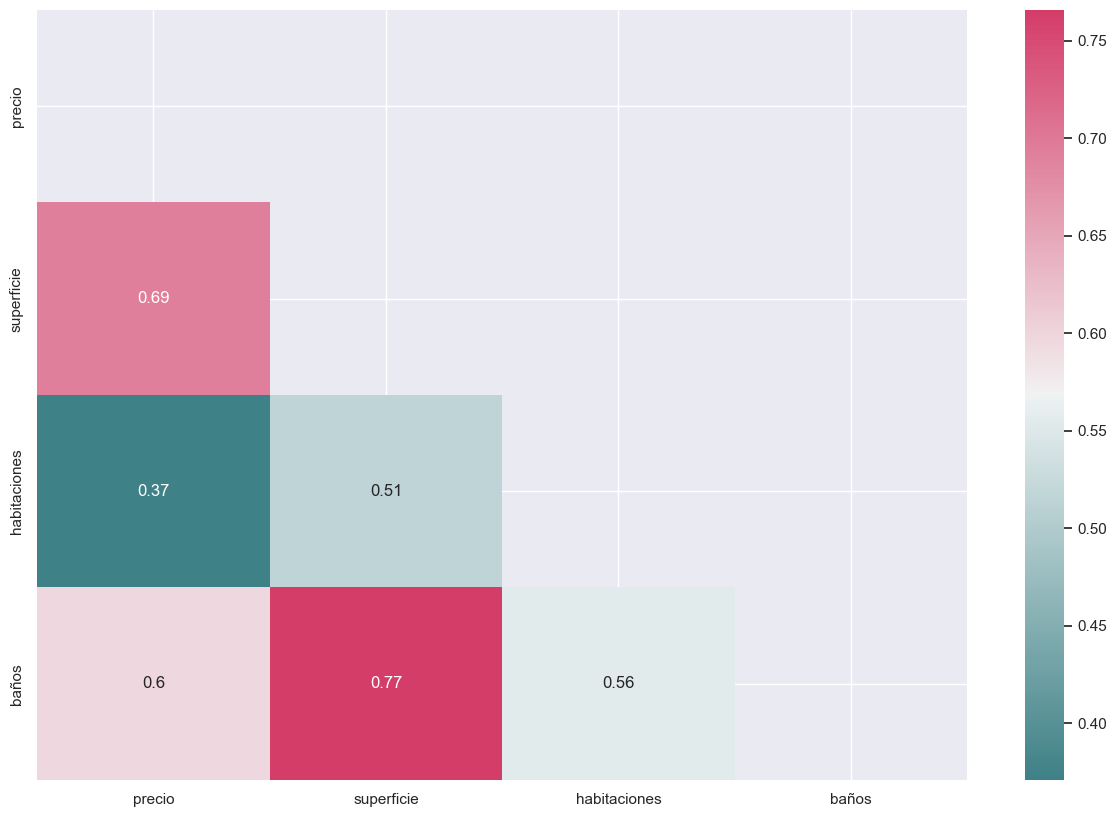

In [60]:
# Comprobamos mediante un heatmap las correlaciones entre las variables
import seaborn as sns
fig, ax = plt.subplots(figsize=(15, 10))
corr = df1.select_dtypes(include=['int', 'float64']).corr()
sns.set_theme(style="darkgrid")
cmap = sns.diverging_palette(200, 0, as_cmap=True)
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, mask=matrix, cmap=cmap)
plt.show()

<Figure size 2000x1000 with 0 Axes>

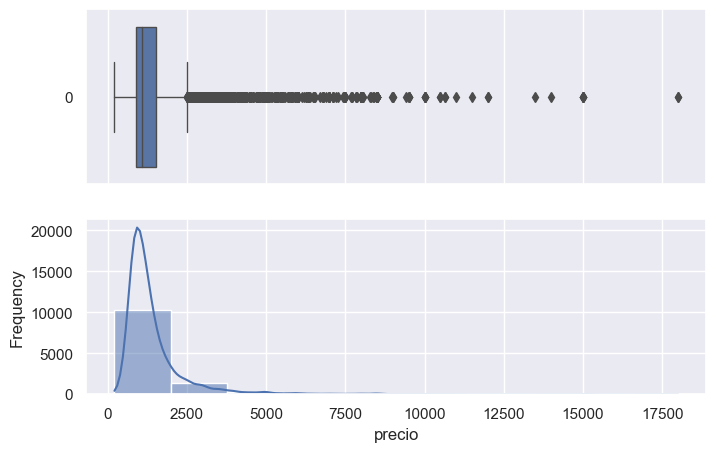

<Figure size 800x500 with 0 Axes>

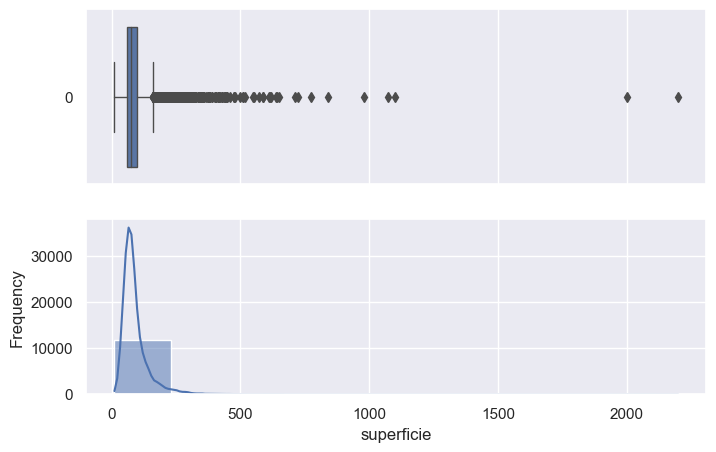

<Figure size 800x500 with 0 Axes>

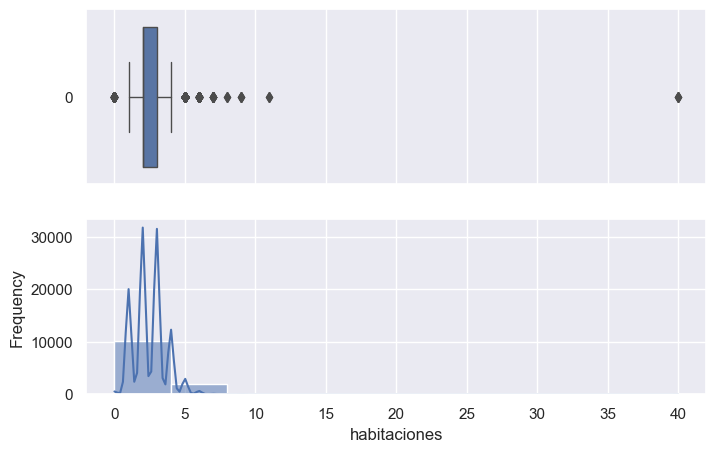

<Figure size 800x500 with 0 Axes>

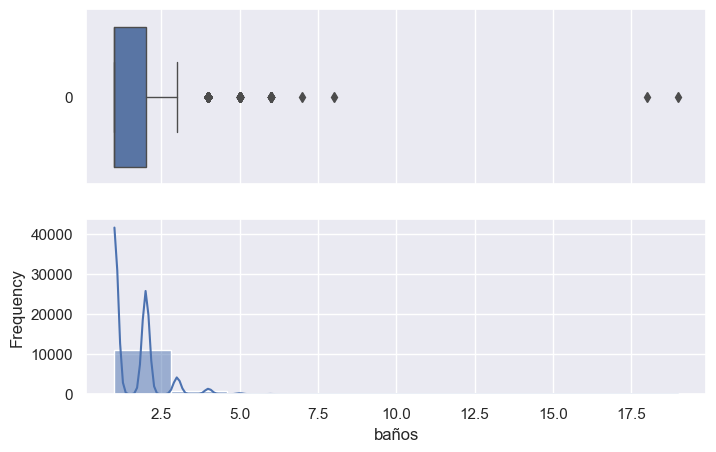

In [61]:
for i in df1[['precio', 'superficie', 'habitaciones', 'baños']]:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df1[i],  ax=ax_box , orient="h", linewidth= 1.0)
    sns.histplot(df1[i], ax=ax_hist , bins = 10,kde=True)

In [62]:
from scipy.stats import shapiro

def distr_normal(df1):
    normal = []
    for col in df1.select_dtypes(include=['int', 'float64']).columns:
        p_valor = shapiro(df1[col])[1]
        normal.append(p_valor > 0.05) 
    return normal
resultado = distr_normal(df1)
print(resultado)

[False, False, False, False]


C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


<h3 style='color:blue'>Ingeniería de Atributos</h3>

**Añadimos nueva columna con el precio de alquiler por m2**

In [63]:
df2 = df1.copy()
df2['precio_por_m2'] = (df2['precio']/df2['superficie']).round(2)
df2.head()

,barrio,distrito,precio,superficie,habitaciones,baños,precio_por_m2
0,el Raval,Ciutat Vella,901,76,2,1,11.86
1,el Raval,Ciutat Vella,1675,136,3,2,12.32
2,el Raval,Ciutat Vella,3977,250,5,3,15.91
3,el Raval,Ciutat Vella,1152,110,3,2,10.47
4,el Raval,Ciutat Vella,838,80,2,1,10.48


In [64]:
df2_stats = df2['precio_por_m2'].describe()
df2_stats

count    12022.000000
mean        16.415109
std          6.841974
min          0.560000
25%         12.290000
50%         14.840000
75%         18.650000
max         85.510000
Name: precio_por_m2, dtype: float64

In [65]:
df2_stats = df2['precio'].describe()
df2_stats

count    12022.000000
mean      1424.410664
std       1086.001041
min        215.000000
25%        880.000000
50%       1100.000000
75%       1531.000000
max      18000.000000
Name: precio, dtype: float64

<h3 style='color:blue'>Eliminación de Valores Atípicos</h3>

**Comprobamos los registros que tienen un número elevado de habitaciones para ver si son datos congruentes**

In [66]:
df2.habitaciones.unique()

array([ 2,  3,  5,  1,  0,  4,  9,  6,  7, 40, 11,  8], dtype=int64)

In [67]:
df2[(df2.habitaciones>6)&(df2.superficie<100)]

,barrio,distrito,precio,superficie,habitaciones,baños,precio_por_m2
1251,Diagonal Mar i el Front Maritim del Poblenou,Sant Martí,697,19,40,6,36.68
1252,Diagonal Mar i el Front Maritim del Poblenou,Sant Martí,712,24,40,6,29.67
1253,Diagonal Mar i el Front Maritim del Poblenou,Sant Martí,662,17,40,6,38.94


**Eliminamos estos registros, ya que claramente son anómalos**

In [68]:
df3 = df2[~((df2.habitaciones >6) & (df2.superficie < 100))]
df3.shape

(12019, 7)

In [69]:
df3[(df3.habitaciones>6)&(df3.superficie<100)]

,barrio,distrito,precio,superficie,habitaciones,baños,precio_por_m2


In [70]:
df3[df3.habitaciones>6]

,barrio,distrito,precio,superficie,habitaciones,baños,precio_por_m2
39,el Raval,Ciutat Vella,3935,380,9,5,10.36
631,Pedralbes,Les Corts,4372,2000,7,18,2.19
696,les Tres Torres,Les Corts,5246,300,7,4,17.49
1694,les Corts,Sants-Montjuïc,6275,300,7,4,20.92
1812,l'Antiga Esquerra de l'Eixample,L'Eixample,2600,153,7,2,16.99
1899,Pedralbes,Les Corts,14000,1100,9,4,12.73
2064,Sant Gervasi - Galvany,Sarrià-Sant Gervasi,7700,640,7,4,12.03
2140,l'Antiga Esquerra de l'Eixample,L'Eixample,3800,305,7,3,12.46
2524,l'Antiga Esquerra de l'Eixample,L'Eixample,4500,350,11,4,12.86
3131,Sant Gervasi - Galvany,Sarrià-Sant Gervasi,15000,773,11,4,19.40


**Comprobamos los registros que tienen un número elevado de baños para ver si son datos congruentes**

In [71]:
df3.baños.unique()

array([ 1,  2,  3,  5,  4, 19,  6,  7, 18,  8], dtype=int64)

In [72]:
df3[df3.baños>4]

,barrio,distrito,precio,superficie,habitaciones,baños,precio_por_m2
39,el Raval,Ciutat Vella,3935,380,9,5,10.36
265,l'Antiga Esquerra de l'Eixample,L'Eixample,1234,2200,3,19,0.56
600,Pedralbes,Les Corts,4765,438,6,5,10.88
604,Pedralbes,Les Corts,7431,610,5,6,12.18
605,Pedralbes,Les Corts,6994,650,6,7,10.76
616,Pedralbes,Les Corts,4809,500,5,5,9.62
619,Pedralbes,Les Corts,4765,440,6,5,10.83
621,Pedralbes,Les Corts,7868,511,5,5,15.40
631,Pedralbes,Les Corts,4372,2000,7,18,2.19
649,Sarria,Les Corts,1837,552,3,5,3.33


**Cómo no es normal que en una casa haya 2 baños más que el número de dormitorios + 2, filtramos por aquí y borramos los registros que nos aparezcan**

In [73]:
df3[df3.baños>df3.habitaciones+2]

,barrio,distrito,precio,superficie,habitaciones,baños,precio_por_m2
265,l'Antiga Esquerra de l'Eixample,L'Eixample,1234,2200,3,19,0.56
631,Pedralbes,Les Corts,4372,2000,7,18,2.19
5089,Sant Pere. Santa Caterina i la Ribera,Ciutat Vella,1600,100,1,4,16.00
6088,el Baix Guinardo,Horta-Guinardó,1295,97,1,4,13.35
9637,Sant Gervasi - Galvany,Sarrià-Sant Gervasi,5500,280,5,8,19.64


In [74]:
df4 = df3[df3.baños<df3.habitaciones+2]
df4.shape

(11998, 7)

In [75]:
df4[df4.baños>df4.habitaciones+2]

,barrio,distrito,precio,superficie,habitaciones,baños,precio_por_m2


**Eliminamos outliers basandonos en el precio por m2 y utilizando la desviación estándar y la media, agrupada por distrito y barrio. Creamos una función para ello**

In [76]:
df4.shape

(11998, 7)

In [77]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for (distrito, barrio), subdf in df.groupby(['distrito', 'barrio']):
        m = np.mean(subdf.precio_por_m2)
        st = np.std(subdf.precio_por_m2)
        reduced_df = subdf[(subdf.precio_por_m2>(m-st)) & (subdf.precio_por_m2<=(m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

df5 = remove_pps_outliers(df4)
df5.shape


(8991, 7)

Text(0, 0.5, 'Cuenta')

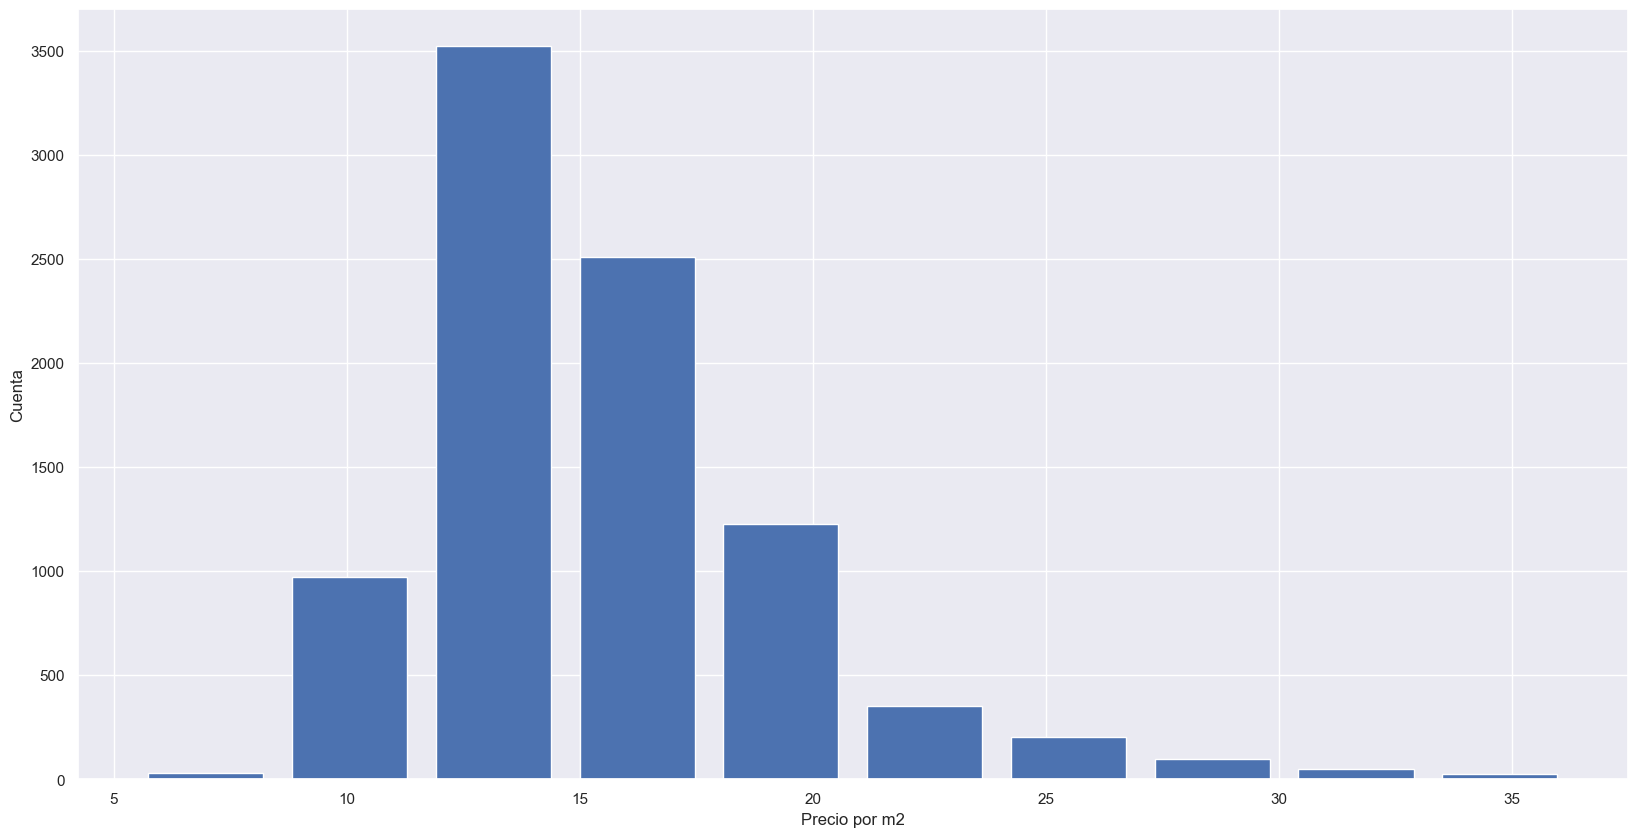

In [79]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df5.precio_por_m2,rwidth=0.8)
plt.xlabel("Precio por m2")
plt.ylabel("Cuenta")

In [81]:
df5.head(20)

,barrio,distrito,precio,superficie,habitaciones,baños,precio_por_m2
0,Barceloneta,Ciutat Vella,377,37,1,1,10.19
1,Barceloneta,Ciutat Vella,1675,135,3,2,12.41
2,Barceloneta,Ciutat Vella,691,58,2,1,11.91
3,Barceloneta,Ciutat Vella,964,54,1,1,17.85
4,Barceloneta,Ciutat Vella,951,80,1,1,11.89
5,Barceloneta,Ciutat Vella,587,43,1,1,13.65
6,Barceloneta,Ciutat Vella,461,36,1,1,12.81
7,Barceloneta,Ciutat Vella,951,90,1,1,10.57
8,Barceloneta,Ciutat Vella,566,48,1,1,11.79
9,Barceloneta,Ciutat Vella,922,63,2,1,14.63


In [82]:
df5 = df5.drop(['precio_por_m2'],axis='columns')
df5.head(20)

,barrio,distrito,precio,superficie,habitaciones,baños
0,Barceloneta,Ciutat Vella,377,37,1,1
1,Barceloneta,Ciutat Vella,1675,135,3,2
2,Barceloneta,Ciutat Vella,691,58,2,1
3,Barceloneta,Ciutat Vella,964,54,1,1
4,Barceloneta,Ciutat Vella,951,80,1,1
5,Barceloneta,Ciutat Vella,587,43,1,1
6,Barceloneta,Ciutat Vella,461,36,1,1
7,Barceloneta,Ciutat Vella,951,90,1,1
8,Barceloneta,Ciutat Vella,566,48,1,1
9,Barceloneta,Ciutat Vella,922,63,2,1


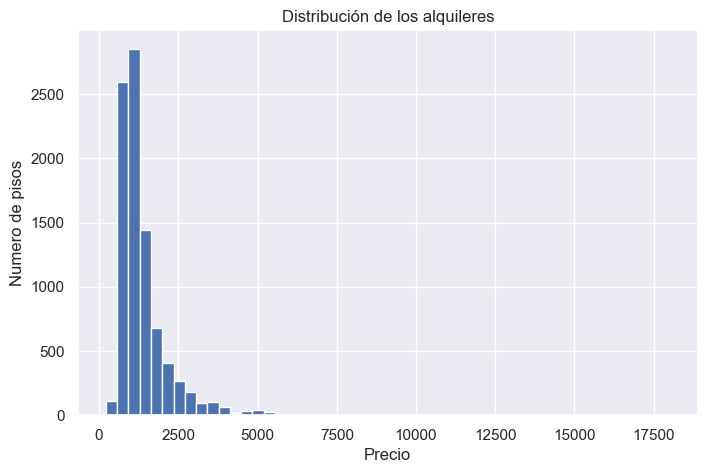

count     8991.000000
mean      1404.199199
std        985.057705
min        215.000000
25%        890.000000
50%       1121.000000
75%       1538.500000
max      18000.000000
Name: precio, dtype: float64
precio_range
<500           44
500-1000     3387
1000-1500    3090
1500-2000    1172
2000-5000    1175
>5000         113
Name: count, dtype: int64


In [83]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que 'df' es tu DataFrame y 'price' es la columna con los precios de alquiler
# 1. Visualización de los datos
df5['precio'].hist(bins=50)
plt.xlabel('Precio')
plt.ylabel('Numero de pisos')
plt.title('Distribución de los alquileres')
plt.show()

# 2. Resumen Estadístico
print(df5['precio'].describe())

# 3. Conteo de Precios en Rangos Específicos
bins = [0, 500, 1000, 1500, 2000, 5000, 10000]  # Estos son solo valores de ejemplo, ajústalos según tu contexto
labels = ['<500', '500-1000', '1000-1500', '1500-2000', '2000-5000', '>5000']
df5['precio_range'] = pd.cut(df5['precio'], bins=bins, labels=labels, right=False)
print(df5['precio_range'].value_counts().sort_index())


<h3 style='color:blue'>Usamos One Hot Encoding por Barrio y Distrito</h3>

In [84]:
dummies_barrio = pd.get_dummies(df5.barrio).astype(int)
dummies_barrio.head(10)

,Barceloneta,Can Baro,Diagonal Mar i el Front Maritim del Poblenou,Fort Pienc,Gotic,Hostafrancs,Navas,Pedralbes,Provencals del Poblenou,Sagrada Familia,...,la Font d'en Fargues,la Font de la Guatlla,la Marina de Port,la Maternitat i Sant Ramon,la Nova Esquerra de l'Eixample,la Sagrera,la Salut,la Vila de Gracia,les Corts,les Tres Torres
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
dummies_distrito = pd.get_dummies(df5.distrito).astype(int)
dummies_distrito.head(10)

,Ciutat Vella,Gràcia,Horta-Guinardó,L'Eixample,Les Corts,Nou Barris,Sant Andreu,Sant Martí,Sants-Montjuïc,Sarrià-Sant Gervasi
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0


In [86]:
df6 = pd.concat([df5,dummies_barrio,dummies_distrito],axis='columns')
df6.head()

,barrio,distrito,precio,superficie,habitaciones,baños,precio_range,Barceloneta,Can Baro,Diagonal Mar i el Front Maritim del Poblenou,...,Ciutat Vella,Gràcia,Horta-Guinardó,L'Eixample,Les Corts,Nou Barris,Sant Andreu,Sant Martí,Sants-Montjuïc,Sarrià-Sant Gervasi
0,Barceloneta,Ciutat Vella,377,37,1,1,<500,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,Barceloneta,Ciutat Vella,1675,135,3,2,1500-2000,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,Barceloneta,Ciutat Vella,691,58,2,1,500-1000,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,Barceloneta,Ciutat Vella,964,54,1,1,500-1000,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,Barceloneta,Ciutat Vella,951,80,1,1,500-1000,1,0,0,...,1,0,0,0,0,0,0,0,0,0


** En este punto tendría que borrar la primera o la última columna al crear las dummies para evitar la multicolinealidad, pero he comprobado que si lo hago así, el modelo resultante espera 2 características menos como datos y me falla en el servidor. De momento lo mantego así a la espera de poder resolverlo de otra manera**

In [87]:
df7 = df6.drop('barrio',axis='columns')
df8 = df7.drop('distrito',axis='columns')
df9 = df8.drop('precio_range',axis='columns')
df9.head(10)

,precio,superficie,habitaciones,baños,Barceloneta,Can Baro,Diagonal Mar i el Front Maritim del Poblenou,Fort Pienc,Gotic,Hostafrancs,...,Ciutat Vella,Gràcia,Horta-Guinardó,L'Eixample,Les Corts,Nou Barris,Sant Andreu,Sant Martí,Sants-Montjuïc,Sarrià-Sant Gervasi
0,377,37,1,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1675,135,3,2,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,691,58,2,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,964,54,1,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,951,80,1,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,587,43,1,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,461,36,1,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,951,90,1,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8,566,48,1,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9,922,63,2,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


<h3 style='color:blue'>Ahora ya podemos construir nuestro modelo...</h3>

In [88]:
df9.shape

(8991, 60)

In [89]:
X = df9.drop(['precio'],axis='columns')
X.head(10)

,superficie,habitaciones,baños,Barceloneta,Can Baro,Diagonal Mar i el Front Maritim del Poblenou,Fort Pienc,Gotic,Hostafrancs,Navas,...,Ciutat Vella,Gràcia,Horta-Guinardó,L'Eixample,Les Corts,Nou Barris,Sant Andreu,Sant Martí,Sants-Montjuïc,Sarrià-Sant Gervasi
0,37,1,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,135,3,2,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,58,2,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,54,1,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,80,1,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,43,1,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,36,1,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,90,1,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8,48,1,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9,63,2,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [90]:
X.shape

(8991, 59)

In [91]:
y = df9.precio
y.head(10)

0     377
1    1675
2     691
3     964
4     951
5     587
6     461
7     951
8     566
9     922
Name: precio, dtype: int32

In [92]:
len(y)

8991

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [94]:
from sklearn.linear_model import Lasso, LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8759798665459919

<h3 style='color:blue'>Utilizamos validación cruzada K-Fold para medir la precisión de nuestro modelo de Regresión Lineal</h3>

In [95]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.87455208, 0.87558945, 0.85613323, 0.83691174, 0.85262198])

**Podemos observar que en 5 iteraciones obtenemos una puntuación superior al 85% casi todo el tiempo. Esto es bastante bueno, pero queremos probar algunos otros algoritmos de regresión para ver si podemos obtener una puntuación aún mejor. Usaremos GridSearchCV para este propósito**

<h3 style='color:blue'>Buscamos el mejor modelo usando GridSearchCV</h3>

In [96]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import pandas as pd
pd.set_option('display.max_colwidth', None)

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
                'n_jobs': [-1],
                'positive': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
                'splitter': ['best', 'random']
            }
        },
        'svr': {
            'model': SVR(),
            'params': {
                'C': [0.01, 0.1, 1, 10],
                'epsilon': [0.01, 0.1, 1],
                'kernel': ['linear', 'rbf']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['best_params','model', 'best_score'])

# Suponiendo que X y y ya están definidos anteriormente
find_best_model_using_gridsearchcv(X, y)


,best_params,model,best_score
0,"{'fit_intercept': False, 'n_jobs': -1, 'positive': False}",linear_regression,0.859162
1,"{'alpha': 1, 'selection': 'random'}",lasso,0.856548
2,"{'criterion': 'friedman_mse', 'splitter': 'best'}",decision_tree,0.835177
3,"{'C': 10, 'epsilon': 1, 'kernel': 'linear'}",svr,0.822772


In [97]:
model = LinearRegression(fit_intercept=False, n_jobs=-1, positive=False)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.875979869781877

**Basándonos en los resultados anteriores, podemos decir que LinearRegression ofrece la mejor puntuación. Por lo tanto, es el que utilizaremos**

<h3 style='color:blue'>Definimos una nueva función para predecir el precio según las características de la vivienda y probar el modelo antes de exportarlo</h3>

In [98]:
def predict_price(distrito, barrio, superficie, baños, habitaciones):    
    loc_index_distrito = np.where(X.columns==distrito)[0][0]
    loc_index_barrio = np.where(X.columns==barrio)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = superficie
    x[1] = baños
    x[2] = habitaciones
    
    if loc_index_distrito >= 0:
        x[loc_index_distrito] = 1
    if loc_index_barrio >= 0:
        x[loc_index_barrio] = 1

    return np.ceil(model.predict([x])[0])

In [99]:
predict_price('Horta-Guinardó','la Font d\'en Fargues',70, 1, 2)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


976.0

In [100]:
predict_price('Sant Andreu','la Sagrera',80, 1, 3)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


1132.0

In [101]:
predict_price('Sant Martí','el Clot',120, 2, 4)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


1708.0

<h3 style='color:blue'>Exportamos el modelo probado a un archivo pickle para su posterior recuperación en la parte servidor</h3>

In [102]:
import pickle
with open('barcelona_home_prices_model.pickle','wb') as f:
    pickle.dump(model,f)

<h3 style='color:blue'>Exportamos los datos de las columnas a un archivo json para poder recuperar posteriormente la información de Distrito y Barrio en nuestra aplicación de predicción</h3>

In [103]:
import json

columns = {
    'data_columns' : list(X.columns)
}

with open("columns.json","w", encoding='utf-8') as f:
    f.write(json.dumps(columns, ensure_ascii=False))